<a href="https://colab.research.google.com/github/lucas-source/data-science/blob/main/Violencia%20RJ/RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro
---
[![author](https://img.shields.io/badge/author-lucas-red.svg)](https://www.linkedin.com/in/lucas-rocha-1904a3172/)
[![GitHub](https://img.shields.io/badge/GitHub-welcome-brightgreen.svg?style=flat)](https://github.com/lucas-source)


<center><img alt="Rio de Janeiro" width="40%" src="https://i.pinimg.com/564x/28/8c/af/288caf110acb9bf5df853a75827c3100.jpg"></center>

  O Rio de Janeiro (RJ) localizado na região sudeste do Brasil é considerada como a "Cidade Maravilhosa" por suas praias, 
clima e beleza natural, entre as montanhas e o mar.
Apesar das maravilhas do Rio De janeiro, o estado tem altos índices de criminalidade que assola o estado.
A violência e o tráfico no RJ vem sendo pauta de noticiários diariamente na qual vem assustando cada dia mais moradores e turistas.

Nesse projeto faremos uma análise exploratória em cima dos dados disponibilizados pelo [portal ISPDados](http://www.ispdados.rj.gov.br/).


## Obtenção dos Dados

Os dados foram obtidos diretamente do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.
No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

<lef><img alt="Rio de Janeiro" width="20%" src="https://basedosdados.org/uploads/group/2019-12-09-003405.576992institutosegurancapublica.jpg"></left> 

## Estrutura do código

* Primeira célula(`RioDeJaneiro`: class)
>Classe construtora, visa atender outros tipos de classes que tenham comportamentos diferentes, utilizando as váriaveis definidas.

* segunda célula(`InterfaceShape`: class, `InterfacePlot`: class)
>A fim de deixa o código de maneira escalável utilizei o conceito de [Interface](https://realpython.com/python-interface/#using-abstract-method-declaration), que é muito utilizado quando se trata de orientação a objeto.

* terceira célula(`ShapeRio`: class) -> (`RioDeJaneiro`: instance,`InterfaceShape`: instance)
>Classe criada para apresentar toda a estrutura do DataFrame.

* quarta célula(`PlotRio`: class)->(`RioDeJaneiro`: instance, `InterfacePlot`: instance)
>Classe criada para plotagem de gráfico.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class RioDeJaneiro:

        def __init__(self) -> None:
            """
            self.data_path : 'csv file'
            self.df : 'dataframe'
            self.fig : 'defined the size of the figure to be plotted'
            """
            self.data_path = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv"
            self.df = pd.read_csv(self.data_path)
            self.fig = plt.figure(figsize=(13, 8))
            pd.set_option('display.max_columns', None)
            pd.set_option('display.max_rows', None)
            return

In [ ]:
from abc import ABC, abstractmethod


class InterfaceShape(ABC):

    @abstractmethod
    def data_shape(self) -> None:
        raise Exception("Should impleent comer method")

    def data_header(self) -> None:
        raise Exception("Should impleent comer method")

    def missing_values(self) -> None:
        raise Exception("Should impleent comer method")

    def describe(self) -> None:
        raise Exception("Should impleent comer method")


class InterfacePlot(ABC):

    @abstractmethod
    def graphic_vehicle_theft(self) -> None:
        raise Exception("Should impleent comer method")

    def graphic_general_records(self) -> None:
        raise Exception("Shoul impleent comer method")

    def graphic_trend(self) -> None:
        raise Exception("Shoul impleent comer method")

    def graphic_manslaughter(self) -> None:
        raise Exception("Shoul impleent comer method")    

In [ ]:

class ShapeRio(RioDeJaneiro, InterfaceShape):

    def __init__(self) -> None:
        super().__init__()
        return

    def data_shape(self) -> None:
        """
        -shape
        -columns
        -type variables
        """
        print(f"linhas: {self.df.shape[0]}\n"
              f"colunas: {self.df.shape[1]}")
        print(self.df.columns)
        print(self.df.dtypes)
        return

    def data_header(self, num: int = 5) -> None:
        print(self.df.head(num))
        return

    def missing_values(self) -> None:
        print((self.df.isnull().sum() / self.df.shape[0]).sort_values(ascending=False))

    def describe(self) -> None:
        print(self.df.describe())


In [ ]:

class PlotRio(RioDeJaneiro, InterfacePlot):

    def __init__(self) -> None:
        super().__init__()
        return

    def graphic_vehicle_theft(self) -> None:
        ax = plt.subplot(131)
        theft = self.df.mean().sort_values(ascending=False)[4:10]
        theft.plot(cmap=plt.get_cmap('Reds'), edgecolor='r', kind="bar", ax=ax)
        plt.xticks(rotation=50,  ha='right')
        ax.set(title="Crimes mais cometidos")
        self.graphic_general_records()
        return

    def graphic_general_records(self) -> None:
        ax = plt.subplot(132)
        theft = self.df.mean().sort_values(ascending=False)[0:4]
        theft.plot(cmap=plt.get_cmap('twilight'), edgecolor='gray', kind="bar", ax=ax)
        plt.xticks(rotation=50, ha='right')
        ax.set(title="Registros")
        plt.show()
        return

    def graphic_trend(self) -> None:
        ax = plt.subplot()
        ax.plot(self.df.sequestro.index, self.df.sequestro, linewidth=1.0, color='red')
        ax.set(title="Roubo Coletivo")
        plt.show()
        return

    def graphic_manslaughter(self) -> None:
      ax = plt.subplot()
      ax.plot(self.df.hom_culposo.index, self.df.hom_culposo, linewidth=1.0, color='red')
      ax.set(title="Homicídio culposo")
      plt.show()
      return


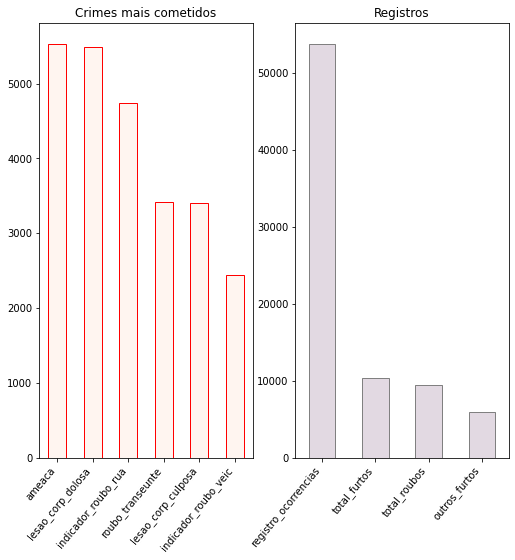

In [ ]:
# 1° Gráfico - Crimes mais cometidos
# 2° Gráfico - Registros das ocorrência 
PlotRio().graphic_vehicle_theft()

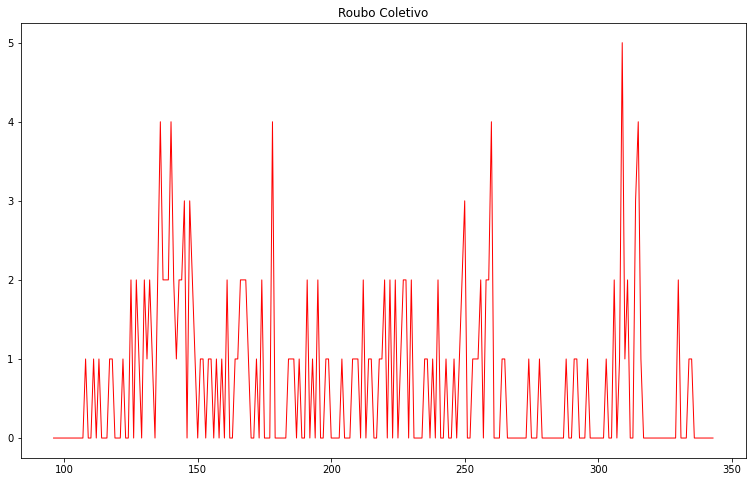

In [ ]:
# Gráfico de roubo coletivo
PlotRio().graphic_trend()

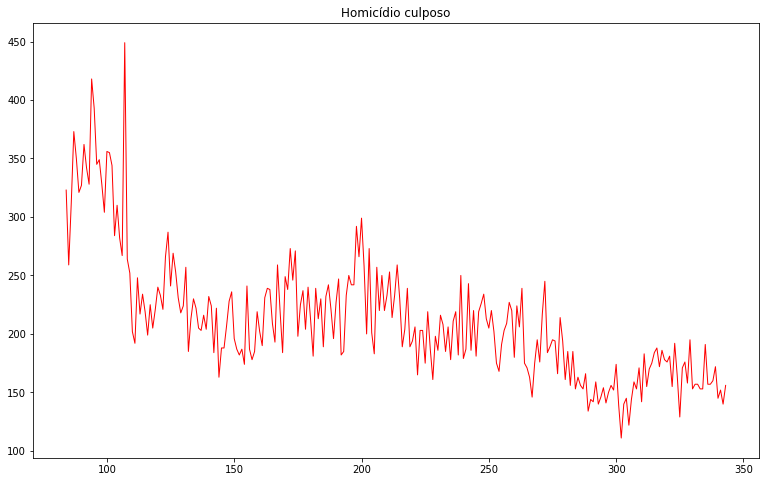

In [ ]:
# Gráfico de homicídio culposo
PlotRio().graphic_manslaughter()

In [ ]:
# Estrutura completa do DataFrame
# 1° Num. de linhas e colunas
# 2° Nome das colunas
# 3° Tipos das variáveis
ShapeRio().data_shape()

linhas: 344
colunas: 56
Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_m

<Figure size 1224x720 with 0 Axes>

In [ ]:
# Verificando as linhas do Dataset.
# O defult do números de linhas é 5, caso queira que imprima mais ou menos só 
# passar o numero(int) pelo parametro ex:
# 'ShapeRio().data_header(20)'
ShapeRio().data_header()

   vano  mes  hom_doloso  lesao_corp_morte  latrocinio  \
0  1991    1         657               NaN          15   
1  1991    2         732               NaN          17   
2  1991    3         713               NaN          25   
3  1991    4         634               NaN          20   
4  1991    5         650               NaN          20   

   hom_por_interv_policial  tentat_hom  lesao_corp_dolosa  estupro  \
0                      NaN         162               3051      NaN   
1                      NaN         175               3421      NaN   
2                      NaN         216               3613      NaN   
3                      NaN         200               3211      NaN   
4                      NaN         146               3051      NaN   

   hom_culposo  lesao_corp_culposa  roubo_comercio  roubo_residencia  \
0          NaN                 NaN             350               188   
1          NaN                 NaN             357               171   
2          NaN

<Figure size 1224x720 with 0 Axes>

In [ ]:
# Porcentagem dos valores faltantes das colunas
ShapeRio().missing_values()

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

<Figure size 1224x720 with 0 Axes>

In [ ]:
# Imprimir o resultado estatístico do DataFrame
ShapeRio().describe()

              vano         mes  hom_doloso  lesao_corp_morte  latrocinio  \
count   344.000000  344.000000  344.000000        248.000000  344.000000   
mean   2004.837209    6.453488  504.555233          4.334677   15.668605   
std       8.289036    3.447759  113.774481          2.755357    5.861427   
min    1991.000000    1.000000  272.000000          0.000000    2.000000   
25%    1998.000000    3.000000  413.750000          2.000000   11.000000   
50%    2005.000000    6.000000  507.000000          4.000000   15.000000   
75%    2012.000000    9.000000  577.250000          6.000000   19.000000   
max    2019.000000   12.000000  831.000000         21.000000   36.000000   

       hom_por_interv_policial  tentat_hom  lesao_corp_dolosa     estupro  \
count                260.00000  344.000000         344.000000  200.000000   
mean                  71.90000  318.267442        5492.799419  369.945000   
std                   36.48882  127.606645        1514.220579   94.392434   
min    

<Figure size 1224x720 with 0 Axes>

##Conclusão

Finalizando a análise de dados do Rio de Janeiro durante o período de 2000 à 2019. E embora o RJ seja um dos lugares mais belos do mundo tendo umas das 7 maravilhas do mundo (Cristo Redentor) mas infelizmente, percebemos que, na maioria dos casos, houve uma crescente nos índices de criminalidade com o passar do tempo. 

Em compensação o número de ocorrências de Homicídios Culposo e Doloso não seguiram a mesma tendência, tendo diminuído ao longo dos anos. Porém ainda apresentam números assustadores. 

**Esse artigo representa uma análise estatística, um estudo baseado em Dados. 
Portanto, nenhum dos dados apresentados aqui leva em consideração opiniões pessoais ou posicionamento político.**